# Video example

Simple example of subsampled dynamic-foreground/static-background video seperation.


In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import cv2

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *

In [2]:
frames = []

path = "../data/dataset_shop.avi"
cap = cv2.VideoCapture(path)
ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        frames.append(img)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)

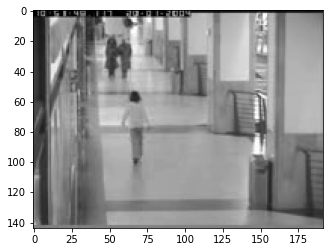

In [3]:
plt.imshow(cv2.cvtColor(video[50,:,:,:], cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
T = video.shape[0]
H = video.shape[1]
W = video.shape[2]
C = video.shape[3]


rho_r = 0.01
rho_s = 0.1
delta = 0.5

m = H*W
n = T
p = round(delta*m*n)
s = round(rho_s*p)
alpha = s/(m*n)
r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))
print(str(r) +','+ str(s))

HTr = FixedRank(r)
HTs = Sparsity(s)

# Prepare transform
A = TensorLinearOperator((T, H * W), FastJLT((p, H * W * T)))

video_mat = video.reshape((T, -1, C))
bs = []
for band in range(C):
    bs.append(A.matvec(video_mat[:,:,band]))

1,217037


In [14]:
bs = []
for band in range(C):
    bs.append(A.matvec(video_mat[:,:,band]))

In [15]:
solver = NAHT(logverbosity = 2, maxiter = 30)
problem = LinearProblemSum(A, bs[0], (HTr, HTs))

In [16]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm
    1	+4.7542514946283245e+08	6.24627988e+03
    2	+3.3062300488704830e+08	4.58347750e+03
    3	+2.5791071041215047e+08	3.94388114e+03
    4	+2.0482173338934559e+08	3.22035458e+03
    5	+1.7095495904793346e+08	2.96485828e+03
    6	+1.4641673884794319e+08	2.70564729e+03
    7	+1.2773495675402564e+08	2.51347540e+03
    8	+1.1398168876785985e+08	2.37794221e+03
    9	+1.0298383324602522e+08	2.26474735e+03
   10	+9.4692369326841131e+07	2.17139332e+03
   11	+8.8186267410039902e+07	2.10711906e+03
   12	+8.2999550139424354e+07	2.04542516e+03
   13	+7.9008810423240736e+07	2.00183709e+03
   14	+7.5804872580596879e+07	1.96403264e+03
   15	+7.3260763985519290e+07	1.93406805e+03
   16	+7.1218286387197256e+07	1.90866587e+03
   17	+6.9558718396295130e+07	1.88731933e+03
   18	+6.8202569470373735e+07	1.86968983e+03
   19	+6.7087540272274405e+07	1.85520734e+03
   20	+6.6173709119479738e+07	1.84233150e+03
   21	+6.5414484347811498e+07	1.83207798e+03
   22	+6.4777838652

In [17]:
opt_log['iterations'].keys()

dict_keys(['iteration', 'time', 'fx', 'xdist'])

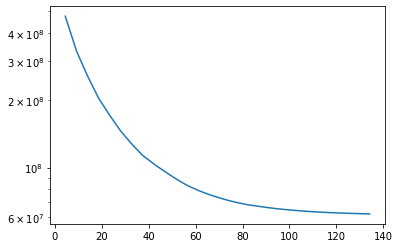

In [18]:
plt.semilogy(opt_log['iterations']['time'], opt_log['iterations']['fx'])

In [19]:
L = x[0].reshape(T, H, W, 1)
S = x[1].reshape(T, H, W, 1)

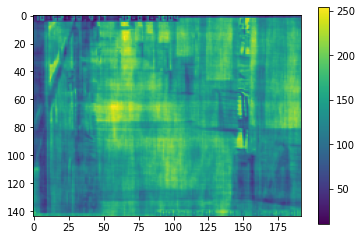

In [20]:
plt.imshow(L[50,:,:,:])
plt.colorbar()

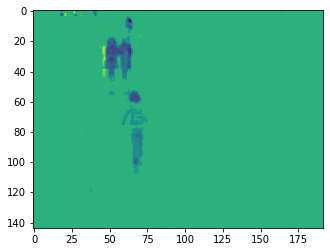

In [21]:
plt.imshow(S[50,:,:,:])